# Load the Titanic Dataset & EDA (Exploratory Data Analysis)

Loading dataset

In [3]:
import pandas as pd

# Load Titanic data
df = pd.read_csv('../data/train.csv')

# Show the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking Dataset info

In [4]:
# Check shape and data types
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Checking missing values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survival Distribution

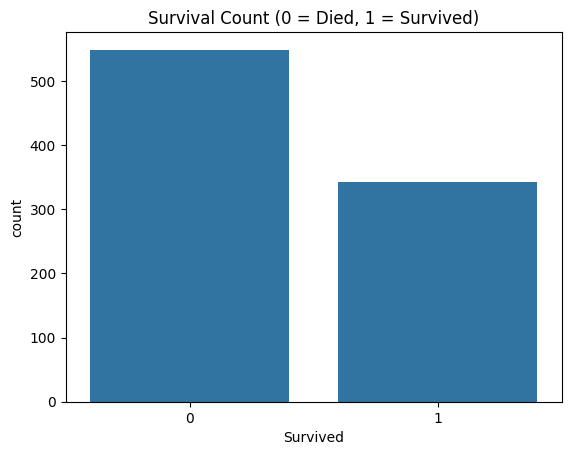

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Countplot for survival
sns.countplot(x="Survived",data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

Exploring the Correalation with Heatmap

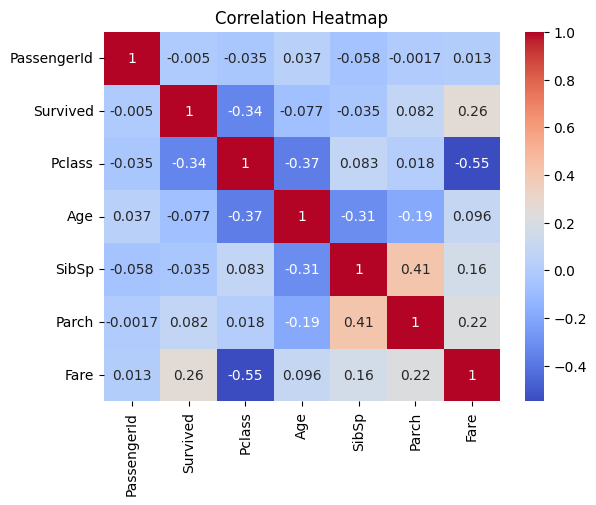

In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr() ,annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Cleaning + Preprocessing

Drop useless columns

In [8]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

Handling of Missing value

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Filling the missing value

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encoding + Train/Test Split

Convert Categorical Columns

In [11]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

Define X (features) and y (target)

In [12]:
X = df.drop('Survived', axis=1)
y = df['Survived']

Split Into Train/Test Sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Check Your Split

In [14]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 8)
Test shape: (179, 8)


# Model Training & Evaluation

Import Required Library

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Train the Model

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Make Predictions

In [29]:
y_pred = model.predict(X_test)

Check Model Accuracy

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 82.12 %


Visualize Confusion Matrix

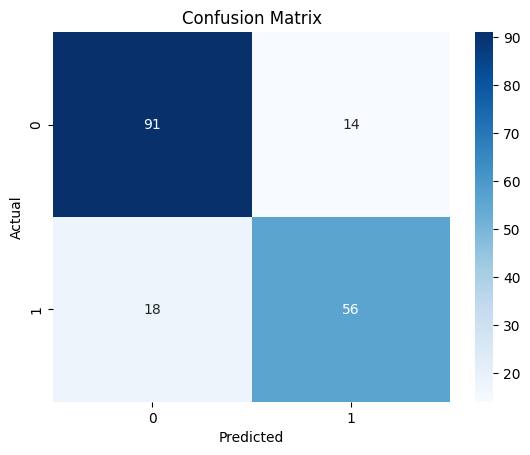

In [19]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


See What Features Were Important

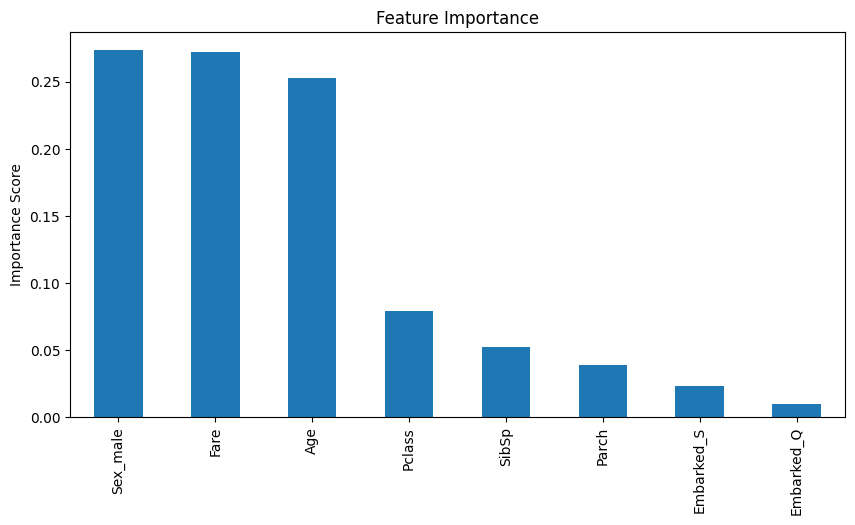

In [20]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

# Make Predictions on Unseen Test Data & Export

Load the Real Test Set

In [31]:
test_df = pd.read_csv("../data/test.csv") 
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Clean the Test Data (Same thing done on training model)

In [32]:
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

Align Columns with Training Data

In [ ]:
# Make sure test_df has same columns as X_train
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Reorder columns to match train data
test_df = test_df[X.columns]

Predict on Test Set

In [36]:
predictions = model.predict(test_df)

Save Results for Kaggle

In [37]:
output = pd.DataFrame({
    'PassengerId': pd.read_csv("../data/test.csv")['PassengerId'],
    'Survived': predictions
})

output.to_csv('titanic_predictions.csv', index=False)
print("Submission file created: titanic_predictions.csv")

Submission file created: titanic_predictions.csv


Save Your Model

In [38]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']